# LTspice Script for General

Purpose: Analysis compensation circuits using LTspice and python

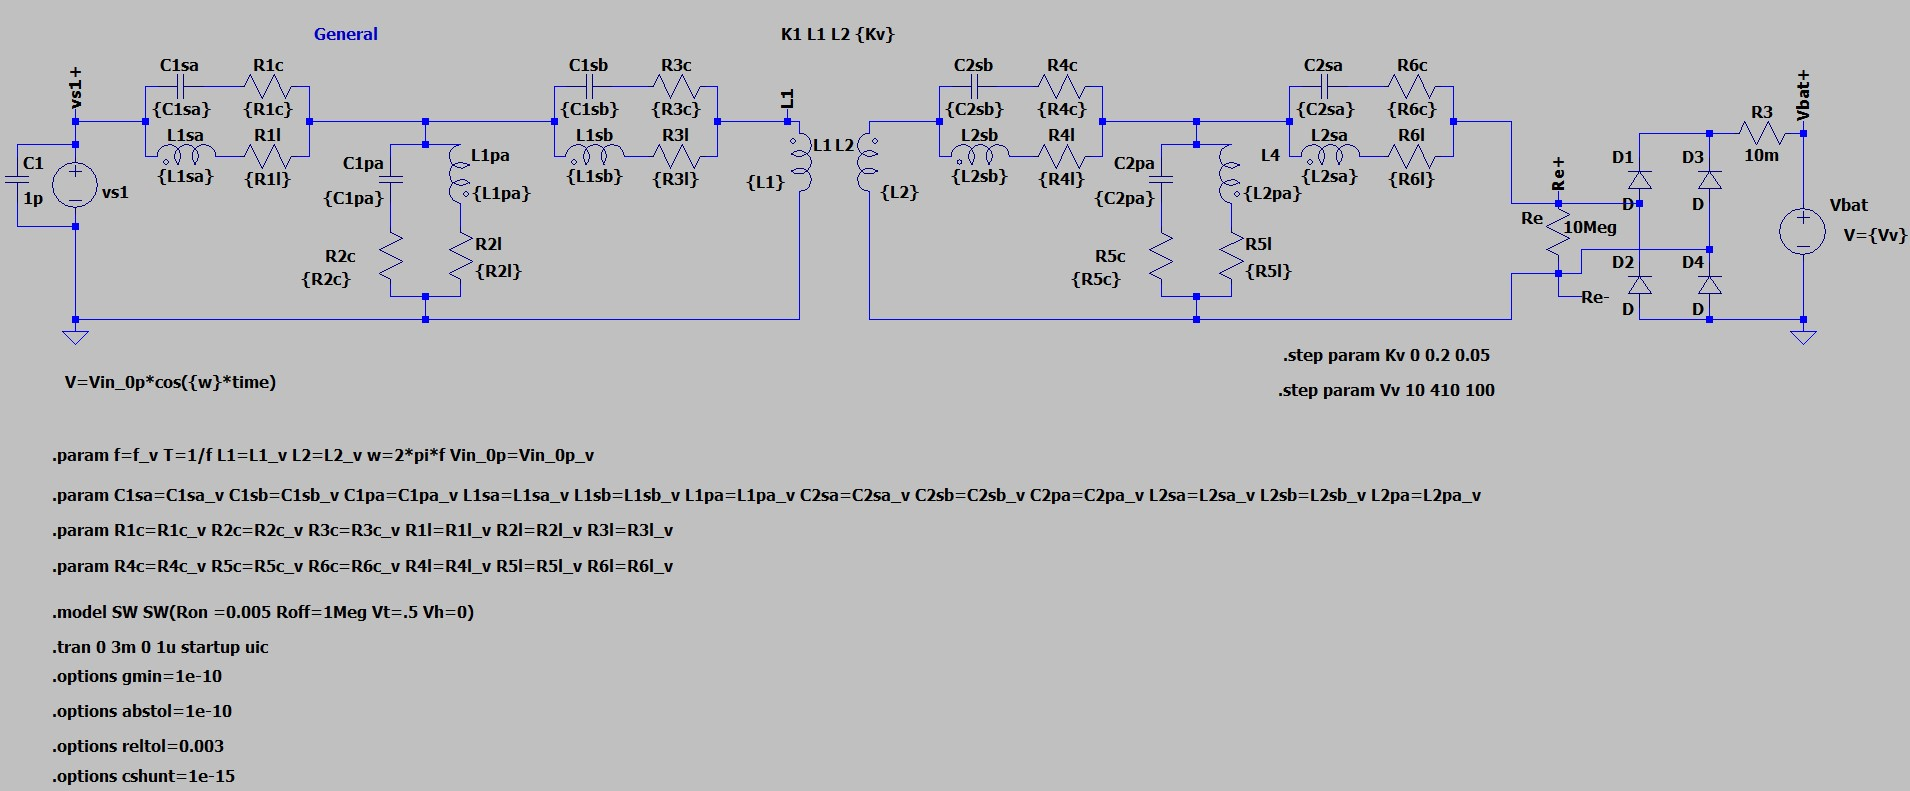

In [72]:
from IPython.display import Image
i=0
image_dir = "./Type_"+ str(i)+"/Overview.jpg"
Image(image_dir,height=300)    

## Import csv file

In [73]:
import pandas as pd

foldername = "./Input/"

df = pd.read_csv(foldername+'LTspice_Script_Input.csv',index_col=0)
df.head(5)

,L1,L2,C1sa,L1sa,C1sb,L1sb,C1pa,L1pa,C2sa,L2sa,C2sb,L2sb,C2pa,L2pa,Zr_im
0,0.000017,0.000017,0.0,0.0,0.0,0.0,2.180431e-07,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,2.093214e-07,0.000000,-0.357806
1,0.000017,0.000017,0.0,0.0,0.0,0.0,2.204751e-07,0.0,0.000000e+00,0.0,1.000000e-06,0.000000,2.647363e-07,0.000000,-0.452530
2,0.000017,0.000017,0.0,0.0,0.0,0.0,2.175324e-07,0.0,0.000000e+00,0.0,0.000000e+00,0.000001,1.975279e-07,0.000000,-0.337647
3,0.000017,0.000017,0.0,0.0,0.0,0.0,2.089021e-07,0.0,0.000000e+00,0.0,1.000000e-08,0.000000,0.000000e+00,0.000334,0.017951
4,0.000017,0.000017,0.0,0.0,0.0,0.0,2.093214e-07,0.0,1.000000e-08,0.0,9.544048e-09,0.000000,0.000000e+00,0.000351,0.000000


## Execute LTspice

In [ ]:
%load_ext autoreload
%autoreload 
import numpy as np
import math
from LTspice.Circuits import Converter

pi = math.pi
f = 85*(10**3) #Hz
w = 2*pi*f #[rad/s]
Vdc = 400 #V
phi = pi
Vin_0p = 4/pi*Vdc*math.sin(phi/2)
Vin_rms = 2*2**0.5/pi*Vdc*math.sin(phi/2)

i = 0 # Type
N = 63 # How many type will you simulate 
Ron = 10*10**(-3) # Ohm
Roff = 10*10**(+6) # Ohm
Cmin = 1*10**(-12) # [F] To improve simulation time 
Lmin = 1*10**(-12) # [H] To improve simulation time

for i in range(0, N):
    simulation_dir = '.\Type_' + str(i) + '\src'
    simulation_src = 'General_v4'

    L1 = df.loc[i, 'L1']
    L2 = df.loc[i, 'L2'] 

    L1sa = df.loc[i, 'L1sa']
    L1sb = df.loc[i, 'L1sb'] 
    L1pa = df.loc[i, 'L1pa'] 
    C1sa = df.loc[i, 'C1sa']
    C1sb = df.loc[i, 'C1sb'] 
    C1pa = df.loc[i, 'C1pa']
    
    if   C1sa == 0 and L1sa != 0: 
        RL1sa = Ron
        RC1sa = Roff
        C1sa = Cmin
    elif C1sa != 0 and L1sa == 0:
        RL1sa = Roff
        RC1sa = Ron
        L1sa = Lmin
    elif C1sa == 0 and L1sa == 0:
        RL1sa = Ron
        RC1sa = Roff
        L1sa = Lmin
        C1sa = Cmin
    else:
        print('Wrong value')
    
    if   C1sb == 0 and L1sb != 0: 
        RL1sb = Ron
        RC1sb = Roff
        C1sb = Cmin
    elif C1sb != 0 and L1sb == 0:
        RL1sb = Roff
        RC1sb = Ron
        L1sb = Lmin
    elif C1sb == 0 and L1sb == 0:
        RL1sb = Ron
        RC1sb = Roff
        L1sb = Lmin
        C1sb = Cmin
    else:
        print('Wrong value')
    
    if   C1pa == 0 and L1pa != 0: 
        RL1pa = Ron
        RC1pa = Roff
        C1pa = Cmin
    elif C1pa != 0 and L1pa == 0:
        RL1pa = Roff
        RC1pa = Ron
        L1pa = Lmin
    elif C1pa == 0 and L1pa == 0:
        RL1pa = Ron
        RC1pa = Roff
        L1pa = Lmin
        C1pa = Cmin
    else:
        print('Wrong value')
        
    L2sa = df.loc[i, 'L2sa']
    L2sb = df.loc[i, 'L2sb'] 
    L2pa = df.loc[i, 'L2pa'] 
    C2sa = df.loc[i, 'C2sa']
    C2sb = df.loc[i, 'C2sb'] 
    C2pa = df.loc[i, 'C2pa'] 

    if   C2sa == 0 and L2sa != 0: 
        RL2sa = Ron
        RC2sa = Roff
        C2sa = Cmin
    elif C2sa != 0 and L2sa == 0:
        RL2sa = Roff
        RC2sa = Ron
        L2sa = Lmin
    elif C2sa == 0 and L2sa == 0:
        RL2sa = Ron
        RC2sa = Roff
        L2sa = Lmin
        C2sa = Cmin
    else:
        print('Wrong value')
    
    if   C2sb == 0 and L2sb != 0: 
        RL2sb = Ron
        RC2sb = Roff
        C2sb = Cmin
    elif C2sb != 0 and L2sb == 0:
        RL2sb = Roff
        RC2sb = Ron
        L2sb = Lmin
    elif C2sb == 0 and L2sb == 0:
        RL2sb = Ron
        RC2sb = Roff
        L2sb = Lmin
        C2sb = Cmin
    else:
        print('Wrong value')
    
    if   C2pa == 0 and L2pa != 0: 
        RL2pa = Ron
        RC2pa = Roff
        C2pa = Cmin
    elif C2pa != 0 and L2pa == 0:
        RL2pa = Roff
        RC2pa = Ron
        L2pa = Lmin
    elif C2pa == 0 and L2pa == 0:
        RL2pa = Ron
        RC2pa = Roff
        L2pa = Lmin
        C2pa = Cmin
    else:
        print('Wrong value')
    
    print(f'Simulating LTspice... {i}/{N-1}')
    General = Converter(simulation_dir,simulation_src+'.asc',{'L1':round(L1,12),'L2':round(L2,12),\
    'f':round(f,6),'Vin_0p':round(Vin_0p,5),'L1sa':round(L1sa,12),'L1sb':round(L1sb,12),\
    'L1pa':round(L1pa,12),'C1sa':round(C1sa,12),'C1sb':round(C1sb,12),'C1pa':round(C1pa,12),\
    'L2sa':round(L2sa,12),'L2sb':round(L2sb,12),'L2pa':round(L2pa,12),'C2sa':round(C2sa,12),\
    'C2sb':round(C2sb,12),'C2pa':round(C2pa,12),\
    'R1l':round(RL1sa,12),'R3l':round(RL1sb,12),'R2l':round(RL1pa,12),\
    'R1c':round(RC1sa,12),'R3c':round(RC1sb,12),'R2c':round(RC1pa,12),\
    'R4l':round(RL2sb,12),'R6l':round(RL2sa,12),'R5l':round(RL2pa,12),\
    'R4c':round(RC2sb,12),'R6c':round(RC2sa,12),'R5c':round(RC2pa,12)})
    General.run()
    print(General)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Simulating LTspice... 0/62
Type_0\src\new_General_v4
LTspice\run_LTspice.cmd "Type_0\src\new_General_v4\new_General_v4.asc"
Simulation finished!
pars finished!
Data printed from converter General_v4

Simulating LTspice... 1/62
Type_1\src\new_General_v4
LTspice\run_LTspice.cmd "Type_1\src\new_General_v4\new_General_v4.asc"
Simulation finished!
pars finished!
Data printed from converter General_v4

Simulating LTspice... 2/62
Type_2\src\new_General_v4
LTspice\run_LTspice.cmd "Type_2\src\new_General_v4\new_General_v4.asc"
Simulation finished!
pars finished!
Data printed from converter General_v4

Simulating LTspice... 3/62
Type_3\src\new_General_v4
LTspice\run_LTspice.cmd "Type_3\src\new_General_v4\new_General_v4.asc"
Simulation finished!
pars finished!
Data printed from converter General_v4

Simulating LTspice... 4/62
Type_4\src\new_General_v4
LTspice\run_LTspice.cmd "Type_4\src\new_General_v4\new_Gene

## Define plot function

In [ ]:
# -*- coding: utf-8 -*-
import math
import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
fig_update = True
import ltspice    
# import matplotlib.pyplot as plt    
import os
import statistics
from matplotlib.pyplot import figure
def cm2inch(value):
    return value/2.54

def MyPlot(simulation_dir, simulation_src):

    pi = math.pi
    fig_width = 10 #cm
    fig_height = 4 #cm
    font_size = 10 # pt
    fig_font = 'Times New Roman'

    # Plot
    plt.style.use('seaborn-whitegrid')
    
    filepath = simulation_dir +'/new_'+simulation_src+'.raw'
    l = ltspice.Ltspice(filepath)
    l.parse() 
    
    matplotlib.rcParams.update({'font.size': font_size, 'font.family': fig_font})  
    fig1=plt.figure(figsize=(cm2inch(fig_width),cm2inch(fig_height)), dpi=100)
    time = l.getTime()
    V_src = l.getData('V(vs1+)')
    I_L1 = l.getData('I(L1)')
    I_out = l.getData('I(Vbat)')
    n_samples = len(V_src)
    window = 0.8
    
    k_start = 0
    k_end = 0.2
    k_interval = 0.05
    n_k = (k_end - k_start)/k_interval
    V_start = 10
    V_end = 410
    V_interval = 100
    j = 0    
    cols = ['k','R[Ohm]','P[W]','P_th[W]','P_th2[W]','I_L1_rms[A]','Vbat[V]']
    df = pd.DataFrame(index=[], columns=cols)
    # Fig 1: Wave forms

    for i in range(l._case_num): # Iteration in simulation cases        
        time = l.getTime(i)
        # Case number starts from zero
        # Each case has different time point numbers
        Vbat = l.getData('V(Vbat+)',i)
        V_R = l.getData('V(Re+,Re-)',i)
        I_R = l.getData('I(Vbat)',i)
        Po = Vbat*I_R
        I_L1 = l.getData('I(L1)',i)    
        I_L2 = l.getData('I(L2)',i)
        V_src = l.getData('V(vs1+)',i)
        
        n_samples = len(time)    
        time_window = time[round(n_samples*window):]
        V_R_window = V_R[round(n_samples*window):]
        Vbat_window = Vbat[round(n_samples*window):]
        I_R_window = I_R[round(n_samples*window):]
        P_R_window = Po[round(n_samples*window):] 
        I_L1_window = I_L1[round(n_samples*window):]    
        I_L2_window = I_L2[round(n_samples*window):]  
        V_src_window = V_src[round(n_samples*window):]
        
        from scipy import integrate
        V_R_rms=np.sqrt(integrate.simps(V_R_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        Vbat_rms=np.sqrt(integrate.simps(Vbat_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        I_R_rms=np.sqrt(integrate.simps(I_R_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        P_R_rms=np.sqrt(integrate.simps(P_R_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        I_L1_rms=np.sqrt(integrate.simps(I_L1_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        I_L2_rms=np.sqrt(integrate.simps(I_L2_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
        V_src_rms=np.sqrt(integrate.simps(V_src_window**2,time_window)/(time_window[len(time_window)-1]-time_window[0]))
    
        if i>1 and i%5 == 0:
            j += 1  
        k_temp = k_start + k_interval*(i%5)
        Vbat_temp = V_start + V_interval*(j)
        R_temp = Vbat_temp**2/P_R_rms
        Re_temp = 8/(pi**2)*R_temp 
        
        df_temp = pd.DataFrame({'k':k_temp, 'R[Ohm]':Re_temp, 'P[W]':P_R_rms,\
                        'I_L1_rms[A]':I_L1_rms, 'Vbat[V]':Vbat_temp}, index=[i])
        df = pd.concat([df, df_temp])   
        if j == 4:  
            plt.plot(time*10**3, I_R, label = 'k='+str(round(k_start+k_interval*(i%5),3))\
                     +', Vbat='+ str(V_start+V_interval*4)+' [V]')   
    plt.grid(True)
    plt.xlim(2.9825, 3.00)
    plt.xlabel("Time [ms]") 
    plt.ylabel("Ibat [A]")
    plt.legend(loc="upper right")     
    plt.show()
    
    # Fig 2: k vs. P 
    fig1=plt.figure(figsize=(cm2inch(fig_width),cm2inch(fig_height)), dpi=100)
    for i in range(int(n_k+1)):
        df_0=df[(df['Vbat[V]']==V_start+V_interval*i) ]
        x = df_0.loc[:,'k']
        y = df_0.loc[:,'P[W]']
        plt.scatter(x, y, label = 'Vbat='+ str(V_start+V_interval*i)+' [V]')
        plt.plot(x, y, linestyle=':')  
    plt.xlabel("k") 
    plt.ylabel("P [W]")
    plt.legend(loc="upper left") 
    plt.show()
    
    # Fig 3: R vs. P    
    fig1=plt.figure(figsize=(cm2inch(fig_width),cm2inch(fig_height)), dpi=100) 
    for i in range(int(n_k+1)):
        df_0=df[(df['k']==k_start+k_interval*i) ]
        x = df_0.loc[:,'Vbat[V]']
        y = df_0.loc[:,'P[W]']
        plt.scatter(x, y, label = 'k='+str(round(k_start+k_interval*i,3)))
        plt.plot(x, y, linestyle = ':')

    plt.xlabel("Vbat [V]") 
    plt.ylabel("P [W]")   
    plt.legend(loc="upper left")
    plt.show()
    
    # Fig 4: k vs. I_L1_rms 
    fig1=plt.figure(figsize=(cm2inch(fig_width),cm2inch(fig_height)), dpi=100)
    for i in range(int(n_k+1)):
        df_0=df[(df['Vbat[V]']==V_start+V_interval*i) ]
        x = df_0.loc[:,'k']    
        y = df_0.loc[:,'I_L1_rms[A]']
        plt.scatter(x, y, label = 'Vbat='+ str(V_start+V_interval*i)+' [V]')
        plt.plot(x, y, linestyle=':')

    plt.xlabel("k") 
    plt.ylabel("I_L1_rms [A]")
    plt.legend(loc="lower left")  
    plt.ylim(ymin=0)    
    plt.show() 

## Plot

In [ ]:
simulation_dir = '.\Type_' + str(i) + '\src'
simulation_src = 'General_v4'
%load_ext autoreload
%autoreload 
!pip install ltspice
!pip install --upgrade PyLTSpice
for i in range(0, N):
    print(f'Plotting Type {i}...')
    MyPlot(simulation_dir, simulation_src)  